In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.nn_dueling import DuelingNet

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

In [2]:
norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
target_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=1,
    train_freq=3,
    batch_size=100,
    w_sync_freq=10,
    memory_size=1000,
    epsilon_start=1,
    epsilon_decay=0.995,
    gamma=0.9,
    step_size=0.01,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.001),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

dqn.run(100)

collecting experience...

Ep: 0 | TS: 19970 | L: 65617.992 | R: -17.93 | P: 17.33 | R.Avg P: 17.33 | NW: 117.33 | R.Avg NW: 117.33 | R.U: 214
Ep: 1 | TS: 39940 | L: 43189.39 | R: -17.5 | P: 33.16 | R.Avg P: 25.24 | NW: 133.16 | R.Avg NW: 125.24 | R.U: 229
Ep: 2 | TS: 59910 | L: 42366.343 | R: -17.79 | P: 32.69 | R.Avg P: 27.73 | NW: 132.69 | R.Avg NW: 127.73 | R.U: 233
Ep: 3 | TS: 79880 | L: 39838.616 | R: -17.7 | P: -1.11 | R.Avg P: 20.52 | NW: 98.89 | R.Avg NW: 120.52 | R.U: 220
Ep: 4 | TS: 99850 | L: 40885.406 | R: -17.34 | P: 27.72 | R.Avg P: 21.96 | NW: 127.72 | R.Avg NW: 121.96 | R.U: 222
Ep: 5 | TS: 119820 | L: 40802.484 | R: -17.68 | P: 35.98 | R.Avg P: 24.3 | NW: 135.98 | R.Avg NW: 124.3 | R.U: 226
Ep: 6 | TS: 139790 | L: 37639.372 | R: -17.46 | P: 0.09 | R.Avg P: 20.84 | NW: 100.09 | R.Avg NW: 120.84 | R.U: 220
Ep: 7 | TS: 159760 | L: 36309.661 | R: -17.37 | P: -6.72 | R.Avg P: 17.39 | NW: 93.28 | R.Avg NW: 117.39 | R.U: 215
Ep: 8 | TS: 179730 | L: 37409.083 | R: -17.04 | P: 

KeyboardInterrupt: 

In [4]:
dqn.evaluate()

## Visualizations

### Training

Text(0.5, 1.0, 'Rolling avg balance per episode')

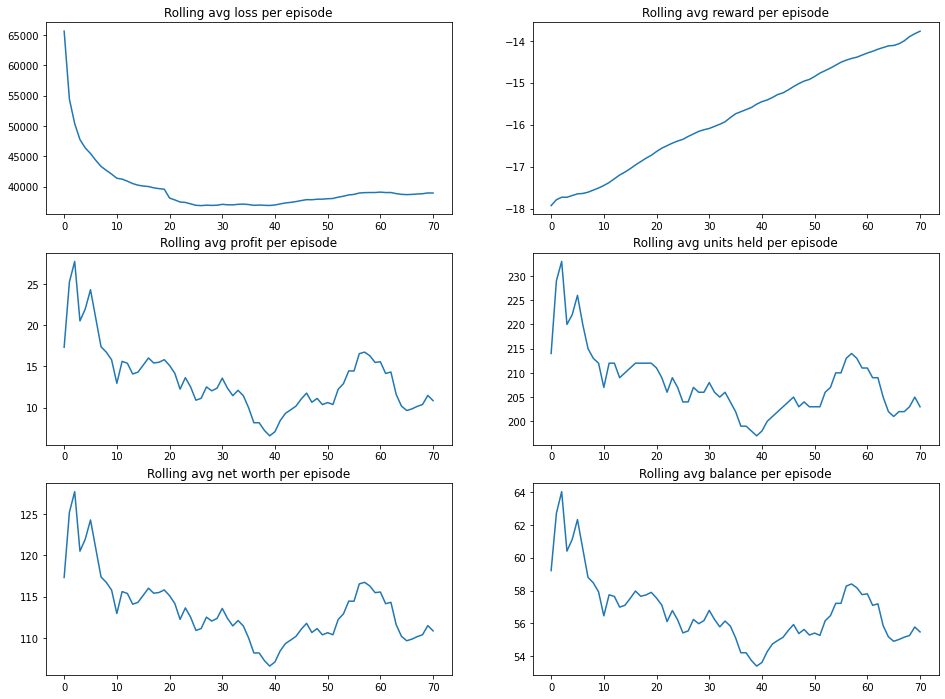

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

### Evaluation

Text(0.5, 1.0, 'Rolling avg balance per episode')

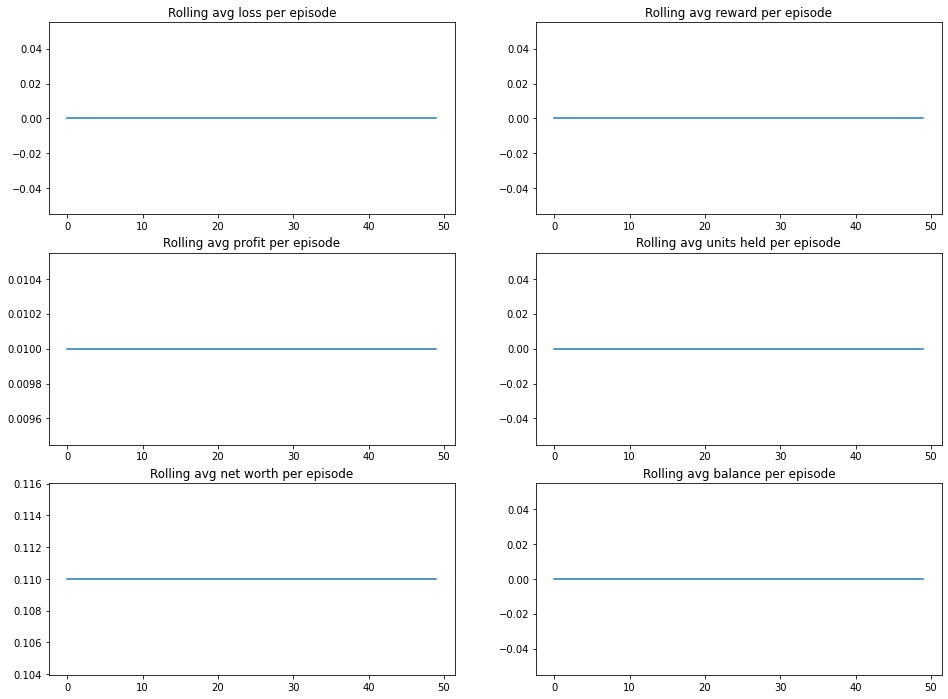

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.eval_logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# import pickle
# temp = dict(dqn.logs)
# with open("../pickles/dqn_d_logs.pickle","wb") as f:
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# torch.save(dqn.target_net.state_dict(), '../models/dqn_d/target_net')
# torch.save(dqn.policy_net.state_dict(), '../models/dqn_d/policy_net')